In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from datetime import datetime

In [6]:
%matplotlib inline
plt.style.use('ggplot')

In [7]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_csv(r'C:\Users\Administrator\Desktop\新一期DataAnalysis\结课大作业\CDNOW.txt',names=columns,sep='\s+') # 分隔符用\s+表示匹配任意空白符。

In [8]:
df.head() #一个用户在一天内可能购买多次，比如用户ID为2的用户就在1月12日买了两次

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [9]:
df.describe()
#用户订单均值为2.4,个商品，平均消费金额为35.8；标准差为2.3，有较大波动；75分位数为3，说明将近75%的订单的单次购买数量不超过3个；
#单次最大购买数量为99，消费金额较大，这也符合28分布，即大多数消费均为小额，有少部分用户购买量较大。

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [10]:
df.info() #数据中没有null值，说明数据很干净，不用清洗；

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [11]:
#下一步进行时间的数据类型转换

In [12]:
df['order_date'] = pd.to_datetime(df.order_dt,format='%Y%m%d') # 提取出时间信息
df['month'] = df.order_date.values.astype('datetime64[M]') # 将日期转换为月份.
#将月份作为消费行为的主要事件窗口，选择哪种时间窗口取决于消费频率。

In [13]:
df.groupby('user_id').sum().describe() #从每个用户的角度来看，平均每人购买7件商品。
#有人会问为什么比前面的平均值多，因为有的用户是在不同的时间购买；
#标准差很大，波动很大，大部分用户在7件之下；

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


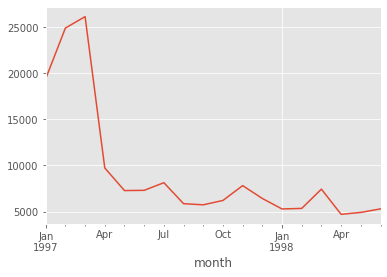

In [14]:
df.groupby('month').order_products.sum().plot() #按月进行分析
#在4月以后销量明显下滑，到了第二年的4月也不见回升！

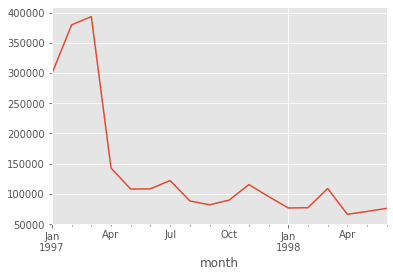

In [15]:
df.groupby('month').order_amount.sum().plot() 
#金额一样呈现早期销售额多，后期平稳下降的趋势
#为什么会呈现这个原因呢？我们假设是用户身上出了问题，早期时间段的用户中有异常值，第二假设是各类促销营销，但这里只有消费数据，所以无法判断。

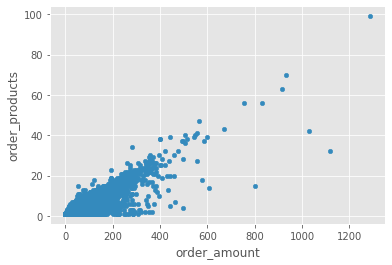

In [16]:
df.plot.scatter(x='order_amount',y='order_products')
#绘制每笔订单的散点图
#订单消费金额和订单商品量呈规律性，每个商品十元左右。订单的极值较少，超出1000的就几个。显然不是异常波动的罪魁祸首。

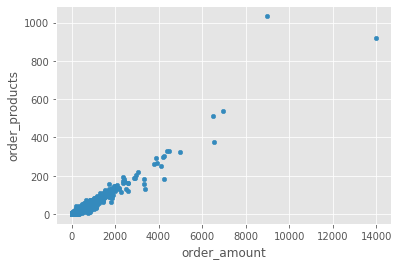

In [17]:
df.groupby('user_id').sum().plot.scatter(x='order_amount',y='order_products')
#绘制用户的散点图，用户也比较健康，而且规律性比订单更强。
#因为这是CD网站的销售数据，商品比较单一，金额和商品量的关系也因此呈线性，没几个离群点。。

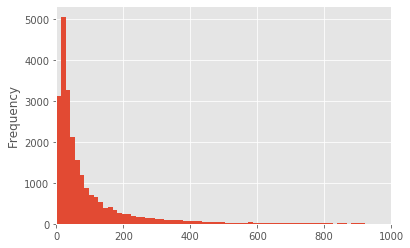

In [18]:
df.groupby('user_id').sum().order_amount.plot(kind='hist',bins=1000,xlim=(0,1000))
# 分析每个用户的消费能力
#从直方图看，大部分用户的消费能力确实不高，几乎都在200元以下，高消费用户在图上几乎看不到。这也确实符合消费行为的行业规律。

In [19]:
#用groupby函数将用户分组，并且求月份的最小值。
#最小值即用户消费行为中的第一次消费时间,最大值为最后一次消费时间。

In [20]:
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [21]:
df.groupby('user_id').month.max().value_counts()
#观察用户的最后一次消费时间。绝大部分数据依然集中在前三个月。
#后续的时间段内，依然有用户在消费，但是缓慢减少。

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [22]:
#接下来分析消费中的复购率和回购率。首先将用户消费数据进行数据透视。

In [23]:
#首先求复购率，复购率的定义是在某时间窗口内消费两次及以上的用户在总消费用户中占比。
#这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将他算作复购用户。
#将数据转换一下，消费两次及以上记为1，消费一次记为0，没有消费记为NaN。
pivoted_counts = df.pivot_table(index='user_id',columns='month',values='order_dt',aggfunc='count').fillna(0)

In [24]:
#如果有复购值就会是1，所以sum除count就是我们要求的复购率，而NaN值并不会被计算，
pivoted_counts_tran = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)

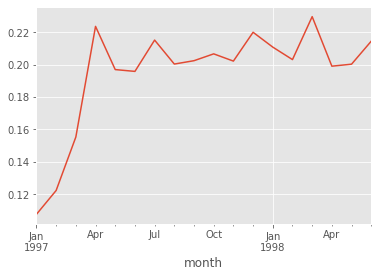

In [25]:
(pivoted_counts_tran.sum()/pivoted_counts_tran.count()).plot()

In [26]:
#图上可以看出复购率在早期，因为大量新用户加入的关系，新客的复购率并不高，譬如1月新客们的复购率只有6%左右。而在后期，这时的用户都是大浪淘沙剩下的老客，复购率比较稳定，在20%左右。
#单看新客和老客，复购率有三倍左右的差距。

In [27]:
#接下来计算回购率。回购率是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。
#比如1月消费用户1000，他们中有300个2月依然消费，回购率是30%。

#回购率的计算比较难，因为它设计了横向跨时间窗口的对比。

In [28]:
pivoted_amount = df.pivot_table(index = 'user_id', columns = 'month',
                                values = 'order_amount', aggfunc = 'mean').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month 
#将消费金额进行数据透视，这里作为练习，使用了平均值。

In [29]:
pivoted_amount.head(5)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [30]:
pivoted_purchase = pivoted_amount.applymap(lambda x: 1 if x>0 else 0)
pivoted_purchase.head(5)
#再次用applymap+lambda转换数据，只要有过购买，记为1，反之为0。

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [30]:
# 使用一个函数来判断是否有回购情况
def purchase_return(data):
         status = []
         for i in range(17):
             if data[i] == 1:
                 if data[i + 1] == 1:
                     status.append(1)
                 if data[i + 1] == 0:
                     status.append(0)
             else:
                 status.append(np.NaN)
         status.append(np.NaN)
         return status
pivoted_purchase_return = pivoted_counts.apply(purchase_return,axis=1) # 用apply函数应用在所有行上，就是每一个用户上
pivoted_purchase_return.head(5)

user_id
1    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
2    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
3    [0, nan, 1, 0, nan, nan, nan, nan, nan, nan, n...
4    [nan, nan, nan, nan, nan, nan, nan, 0, nan, na...
5    [nan, 0, nan, 1, 1, 1, 0, nan, 0, nan, nan, na...
dtype: object

In [38]:
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize = (10,4))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [31]:
#从图中可以看出，用户的回购率高于复购，约在30%左右，波动性也较强。新用户的回购率在15%左右，和老客差异不大。

#将回购率和复购率综合分析，可以得出，新客的整体质量低于老客，
#老客的忠诚度（回购率）表现较好，消费频次稍次，这是CDNow网站的用户消费特征。

In [32]:
#接下来进行用户分层，我们按照用户的消费行为，简单划分成几个维度：新用户、活跃用户、不活跃用户、回流用户。

#新用户的定义是第一次消费。活跃用户即老客，在某一个时间窗口内有过消费。不活跃用户则是时间窗口内没有消费过的老客。
#回流用户是在上一个窗口中没有消费，而在当前时间窗口内有过消费。以上的时间窗口都是按月统计。

#比如某用户在1月第一次消费，那么他在1月的分层就是新用户；他在2月消费国，则是活跃用户；
#3月没有消费，此时是不活跃用户；4月再次消费，此时是回流用户，5月还是消费，是活跃用户。

#分层会涉及到比较复杂的逻辑判断。

In [33]:
def active_status(data):
    status = []
    for i in range(17):

        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg': #未注册
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')

    return status
pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_status(x),axis = 1 )
pivoted_purchase_status.head(5)
#pivoted_status = pivoted_counts.apply(active_status,axis=1)

user_id
1    [new, unactive, unactive, unactive, unactive, ...
2    [new, unactive, unactive, unactive, unactive, ...
3    [new, unactive, return, active, unactive, unac...
4    [new, unactive, unactive, unactive, unactive, ...
5    [new, active, unactive, return, active, active...
dtype: object

In [34]:
purchase_status_counts =pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x)) #统计计数 regis状态排除掉，它是「未来」才作为新客，这么能计数呢.
purchase_status_counts

,unactive,new,return,active,unreg
user_id,,,,,
1,16.0,1.0,NaN,NaN,NaN
2,16.0,1.0,NaN,NaN,NaN
3,12.0,1.0,3.0,1.0,NaN
4,14.0,1.0,2.0,NaN,NaN
5,8.0,1.0,3.0,5.0,NaN
6,16.0,1.0,NaN,NaN,NaN
7,14.0,1.0,2.0,NaN,NaN
8,10.0,1.0,3.0,3.0,NaN
9,15.0,1.0,1.0,NaN,NaN


In [31]:
purchase_status_counts.fillna(0).T.plot.area(figsize = (12,6))

NameError: name 'purchase_status_counts' is not defined

In [35]:
return_rate = purchase_status_counts.apply(lambda x:x/x.sum(),axis=1)
return_rate.loc['return'].plot(figsize = (12,6))

KeyError: 'return'

In [36]:
return_rate.loc['active'].plot(figsize = (12,6))

KeyError: 'active'

In [35]:
#接下来分析用户质量，因为消费行为有明显的二八倾向，我们需要知道高质量用户为消费贡献了多少份额。

In [37]:
ser_amount = df.groupby('user_id').order_amount.sum().sort_values().reset_index() # 排序
user_amount['amount_cumsum'] = user_amount.order_amount.cumsum() # 累加
user_amount['prop'] = user_amount.apply(lambda x:x.amount_cumsum/user_amount.amount_cumsum.max(),axis=1) # 求概率分布
user_amount.prop.plot()
#绘制趋势图，横坐标是按贡献金额大小排序而成，纵坐标则是用户累计贡献。
#可以很清楚的看到，前20000个用户贡献了40%的消费。后面4000位用户贡献了60%，确实呈现28倾向。

NameError: name 'user_amount' is not defined

In [32]:
#计算用户生命周期，这里定义第一次消费至最后一次消费为整个用户生命。
(df.groupby('user_id').order_date.max() - df.groupby('user_id').order_date.min()).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_date, dtype: object

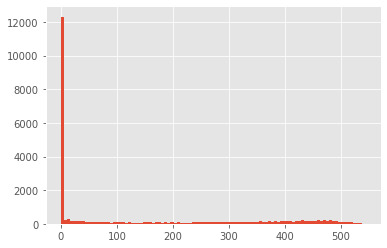

In [33]:
((df.groupby('user_id').order_date.max() - df.groupby('user_id').order_date.min())/np.timedelta64(1,'D')).hist(bins=100) 
# 换算的方式直接除timedelta函数即可，这里的np.timedelta64(1, 'D')，D表示天，1表示1天，作为单位使用的

In [34]:
#大部分用户只消费了一次，所有生命周期的大头都集中在了0天。
#但这不是我们想要的答案，不妨将只消费了一次的新客排除，来计算所有消费过两次以上的老客的生命周期。

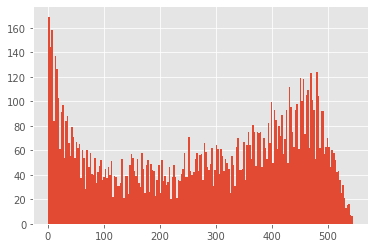

In [35]:
life_time =(df.groupby('user_id').order_date.max() - df.groupby('user_id').order_date.min())/np.timedelta64(1,'D')
life_time[life_time > 0].hist(bins=200) 
# 也可以再给life_time加一个column让他讲他转为Dataframe